In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
np.random.seed(42)  
x = np.random.rand(100) * 10  # Advertising Spend (in $1000s)
y = 2.5 * x + np.random.normal(size=100) * 3  # Sales with noise  

data = pd.DataFrame({'x': x, 'y': y}) 

In [4]:
X = sm.add_constant(data['x'])  # Adds an intercept term
model = sm.OLS(data['y'], X).fit()  

data['y_pred'] = model.predict(X)  # Predicted values  
residuals = model.resid  # Residuals (errors)

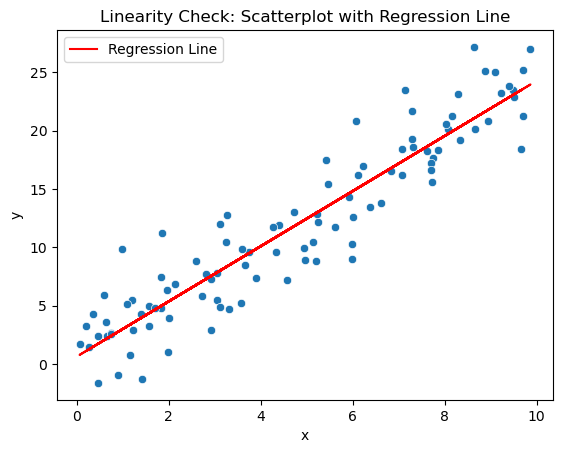

In [5]:
sns.scatterplot(x='x', y='y', data=data)  
plt.plot(data['x'], data['y_pred'], color='red', label='Regression Line')  
plt.title('Linearity Check: Scatterplot with Regression Line')  
plt.legend()
plt.show()

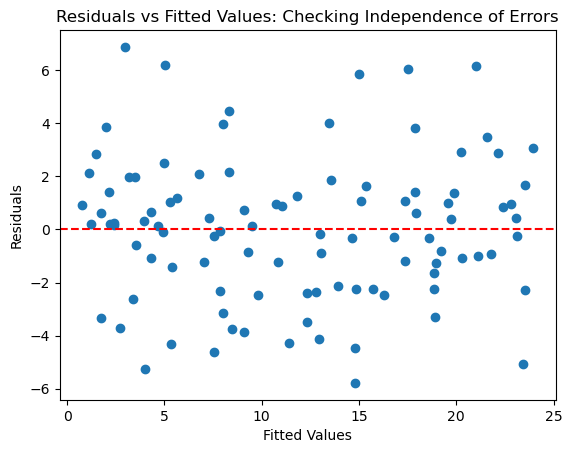

In [7]:
# Independence of errors

plt.scatter(data['y_pred'], residuals)  
plt.axhline(0, color='red', linestyle='--')  
plt.title('Residuals vs Fitted Values: Checking Independence of Errors')  
plt.xlabel('Fitted Values')  
plt.ylabel('Residuals')  
plt.show() 

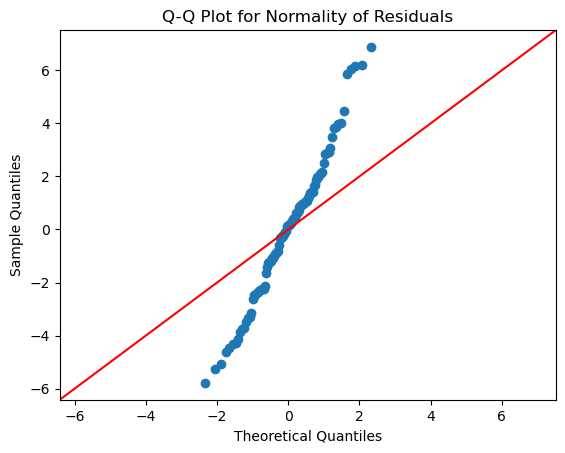

In [8]:
# Normality of errors
# This result requires to investigate further

sm.qqplot(residuals, line='45')  
plt.title('Q-Q Plot for Normality of Residuals')  
plt.show()

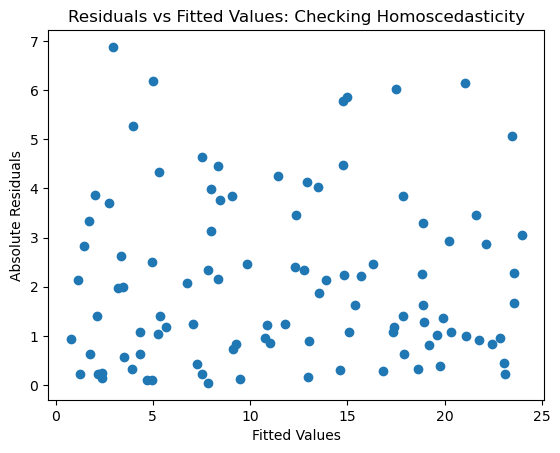

In [9]:
# Equal Variance or Homoscedasticity
# Maybe additional investigation because there are more dots at the bottom

plt.scatter(data['y_pred'], np.abs(residuals))  
plt.title('Residuals vs Fitted Values: Checking Homoscedasticity')  
plt.xlabel('Fitted Values')  
plt.ylabel('Absolute Residuals')  
plt.show()

At this stage, you review the diagnostics:

1) Linearity: The scatterplot should confirm a linear trend.
2) Independence of Errors: The residuals plot should show random scatter around zero.
3) Normality of Errors: The Q-Q plot should indicate normally distributed residuals.
   
   3.1) Residuals are not perfectly normally distributed
    ⚠️ There is evidence of non-normality, especially in the tails, which suggests potential outliers or skewness.
   
5) Equal Variances: Residual spread should be consistent across all fitted values.

By carefully validating these assumptions, you ensure your advertising spend vs. sales model is reliable and robust. Imagine presenting a poorly validated model to the leadership team; it could lead to misallocated budgets and lost opportunities. By using diagnostic tools like scatterplots, residual plots, and Q-Q plots, you identify and address any violations early, building confidence in your predictions.